### Introducción a JAX

JAX es una biblioteca de Python desarrollada por Google para realizar cálculos numéricos avanzados. Combina la simplicidad de NumPy con el rendimiento de un compilador JIT y capacidades automáticas de diferenciación.

In [26]:
import jax
import jax.numpy as jnp

### Comparación con TensorFlow y PyTorch

1. **Rendimiento**: JAX utiliza XLA para optimizar operaciones, mejorando la eficiencia en GPUs y TPUs.
2. **Flexibilidad**: JAX permite diferenciación automática en cualquier función Python pura.
3. **Facilidad de uso**: Aunque similar a NumPy, su enfoque funcional requiere un aprendizaje inicial más profundo.

### Ecosistema

- **Flax**: Framework de aprendizaje profundo en JAX.
- **Optax**: Herramienta para la optimización.
- **Stax**: Biblioteca de especificación de redes neuronales

## Ejemplos de entrenamiento
Vamos a entrenar el "mismo" modelo con cada framework para comparar los resultados y el rendimiento.

Elegiremos el conjunto de datos `wine` de `sckit-learn` para hacer este estudio.


### Preparación de los datos

In [27]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función scikit-learn para cargar el conjunto de datos de vino.
from sklearn.datasets import load_wine

# Función para dividir los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Clase para normalizar los datos (media 0, desviación estándar 1)
from sklearn.preprocessing import StandardScaler

# Función para calcular la precisión
from sklearn.metrics import accuracy_score

In [28]:
# Carga de datos
dataset = load_wine()

In [29]:
# Matriz de características
X = dataset.data
# Datos de cada muestra de vino
feature_names = dataset.feature_names

X_df = pd.DataFrame(dataset.data, columns=feature_names)

# Extraemos el target
y = dataset.target

In [30]:
# Divide los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [31]:
# Normalizamos X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Establecemos las etapas
epochs = 100

### TensorFlow

In [33]:
# Importación de librerías
import tensorflow as tf
from tensorflow import keras

In [34]:
# Contrucción del modelo
model_tf = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [35]:
# Compilado del modelo (indicamos la función de perdida y el optimizador)
model_tf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
# Entrenamiento del modelo calculado el tiempo
start_time = time.time()

model_tf.fit(X_train, y_train, epochs=epochs, batch_size=32)

end_time = time.time()
tensorFlow_time = end_time - start_time

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.3362e-04 
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.4443e-04 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.2860e-04 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 5.2164e-04 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 6.2226e-04 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.0002e-04 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.9163e-04 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.9593e-04 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.8117e-04 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 5.1373e-04 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.9288e-04 
Epoch 12/100
5/5 ━━━━━━━━━━━━━

In [37]:
# Evaluación del modelo
y_pred_tf = model_tf.predict(X_test)
y_pred_tf = np.argmax(y_pred_tf, axis=1)
accuracy_tf = accuracy_score(y_test, y_pred_tf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


### PyTorch

In [38]:
# Importación de librerías
import torch
import torch.nn as nn
import torch.optim as optim

In [39]:
# Contrucción del modelo
model_PyTorch = nn.Sequential(
    nn.Linear(13, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 3),
    nn.Softmax(dim=1)
)

In [40]:
# Función de perdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_PyTorch.parameters(), lr=0.001)

In [41]:
# Preparacion de tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

In [42]:
# Entrenamiento calculando el tiempo
start_time = time.time()

for epoch in range(epochs):
  outputs = model_PyTorch(X_train_tensor)
  loss = criterion(outputs, y_train_tensor)

  print(f"Epoch: [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

end_time = time.time()
PyTorch_time = end_time - start_time

Epoch: [1/100], Loss: 1.0991
Epoch: [2/100], Loss: 1.0981
Epoch: [3/100], Loss: 1.0971
Epoch: [4/100], Loss: 1.0961
Epoch: [5/100], Loss: 1.0951
Epoch: [6/100], Loss: 1.0941
Epoch: [7/100], Loss: 1.0931
Epoch: [8/100], Loss: 1.0920
Epoch: [9/100], Loss: 1.0910
Epoch: [10/100], Loss: 1.0899
Epoch: [11/100], Loss: 1.0888
Epoch: [12/100], Loss: 1.0877
Epoch: [13/100], Loss: 1.0865
Epoch: [14/100], Loss: 1.0853
Epoch: [15/100], Loss: 1.0841
Epoch: [16/100], Loss: 1.0829
Epoch: [17/100], Loss: 1.0817
Epoch: [18/100], Loss: 1.0804
Epoch: [19/100], Loss: 1.0791
Epoch: [20/100], Loss: 1.0778
Epoch: [21/100], Loss: 1.0764
Epoch: [22/100], Loss: 1.0750
Epoch: [23/100], Loss: 1.0736
Epoch: [24/100], Loss: 1.0722
Epoch: [25/100], Loss: 1.0707
Epoch: [26/100], Loss: 1.0692
Epoch: [27/100], Loss: 1.0677
Epoch: [28/100], Loss: 1.0661
Epoch: [29/100], Loss: 1.0644
Epoch: [30/100], Loss: 1.0627
Epoch: [31/100], Loss: 1.0610
Epoch: [32/100], Loss: 1.0592
Epoch: [33/100], Loss: 1.0573
Epoch: [34/100], Lo

In [43]:
# Evaluación del modelo
# Cambiar el modelo a modo evaluación
model_PyTorch.eval()

# Pasamos datos de test a tensores
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Evalúa en el conjunto de prueba
with torch.no_grad(): # Descativa el cálculo de gradientes
  outputs = model_PyTorch(X_test_tensor) # Preddiciones del modelo
  predictions = torch.argmax(outputs, dim=1).numpy() # Recojo la clase más probable (el valor más alto) y lo paso a NumPy
  y_test_numpy = y_test_tensor.numpy() # Convierte etiquetas reales a NumPy

# Calcula la precisión
accuracy_PyTorch = accuracy_score(y_test_numpy, predictions)

### Jax


In [44]:
# Importación de librerias
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
from jax.example_libraries import optimizers
from jax.example_libraries import stax

In [50]:
# Construcción del modelo

# Define the model using stax
init_random_params, predict = stax.serial(
    stax.Dense(128),
    stax.Relu,
    stax.Dense(64),
    stax.Relu,
    stax.Dense(3),
    stax.Softmax
)

# Initialize the model parameters
key = random.PRNGKey(0)
_, init_params = init_random_params(key, (X_train.shape[1],))

In [51]:
# Función de perdida y optimizador
def loss_fn(params, inputs, targets):
  preds = predict(params, inputs)
  return -jnp.mean(jnp.sum(preds * jax.nn.one_hot(targets, 3), axis=1))

# Define the optimizer
opt_init, opt_update, get_params = optimizers.adam(1e-3)
opt_state = opt_init(init_params)

In [ ]:
# Define the update function
@jit
def update(params, x, y, opt_state):
  grads = grad(loss_fn)(params, x, y)
  opt_state = opt_update(0, grads, opt_state)
  return get_params(opt_state), opt_state

In [52]:
# Entrenamiento calculando el tiempo
start_time = time.time()
for epoch in range(epochs):
  params, opt_state = update(get_params(opt_state), X_train, y_train, opt_state)

end_time = time.time()
jax_time = end_time - start_time

In [53]:
# Evaluación
y_pred_jax = predict(params, X_test)
y_pred_jax = jnp.argmax(y_pred_jax, axis=1)
accuracy_jax = accuracy_score(y_test, y_pred_jax)

## Comparaciones

### Precisión

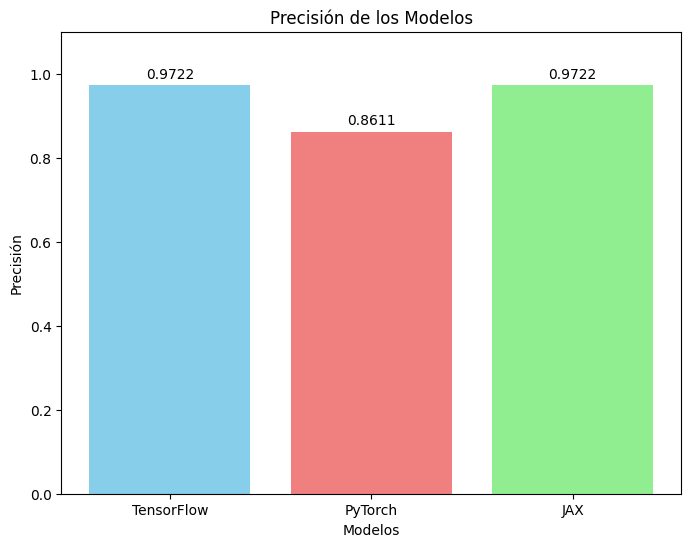

In [54]:
# Accuracy values for each model
accuracy_values = [accuracy_tf, accuracy_PyTorch, accuracy_jax]
model_names = ['TensorFlow', 'PyTorch', 'JAX']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_values, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Precisión de los Modelos')

# Add labels above each bar
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.1) # Adjust y-axis limits for better visualization
plt.show()

## Tiempo


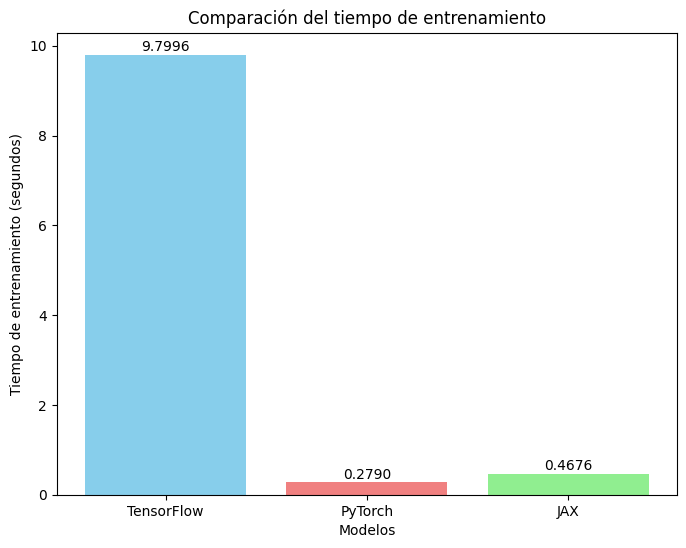

In [55]:
# Tiempo de entrenamiento para cada modelo
training_times = [tensorFlow_time, PyTorch_time, jax_time]
model_names = ['TensorFlow', 'PyTorch', 'JAX']

# Crea la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(model_names, training_times, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Modelos')
plt.ylabel('Tiempo de entrenamiento (segundos)')
plt.title('Comparación del tiempo de entrenamiento')

# Agrega etiquetas encima de cada barra
for i, v in enumerate(training_times):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.show()

### Precisión vs Tiempo

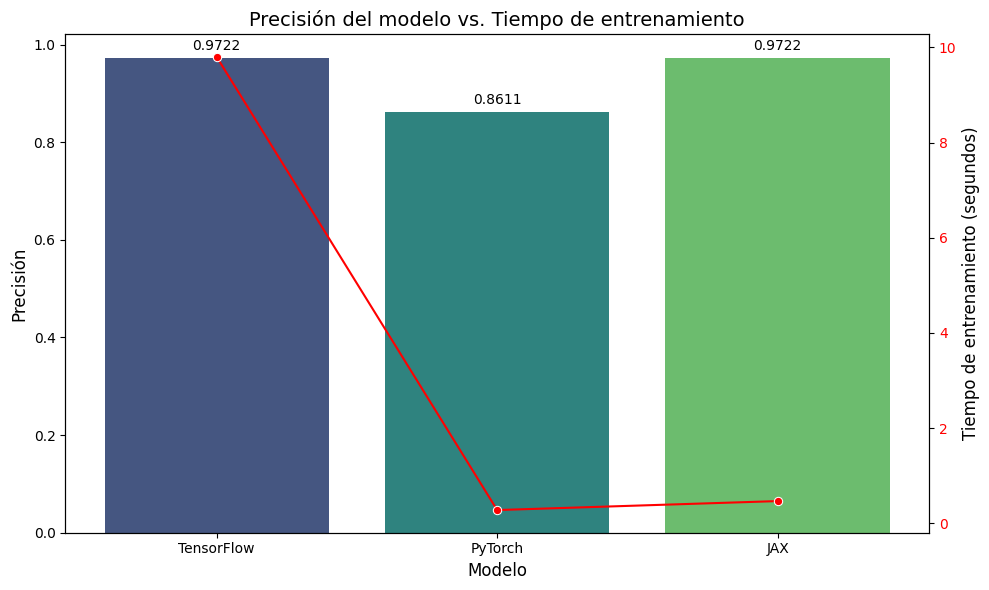

In [60]:
import seaborn as sns

# Datos de precisión y tiempo de entrenamiento
accuracy_values = [accuracy_tf, accuracy_PyTorch, accuracy_jax]
training_times = [tensorFlow_time, PyTorch_time, jax_time]
model_names = ['TensorFlow', 'PyTorch', 'JAX']

# Crear un DataFrame de pandas
data = {'Model': model_names, 'Accuracy': accuracy_values, 'Training Time': training_times}
df = pd.DataFrame(data)

# Creating the bar plot with Seaborn (updated)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Model', data=df, palette='viridis', errorbar=None, legend=False)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.title('Precisión del modelo vs. Tiempo de entrenamiento', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Agregar valores de precisión encima de las barras
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=10)

# Agregar segundo eje y para el tiempo de entrenamiento
ax2 = plt.twinx()
sns.lineplot(x='Model', y='Training Time', data=df, marker='o', color='red', ax=ax2, sort=False)  # Línea roja para el tiempo
ax2.set_ylabel('Tiempo de entrenamiento (segundos)', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')


plt.tight_layout() # Ajustar la disposición para evitar superposiciones
plt.show()

## Conclusión

Jax no tiene nada que enviadiarle a sus homónimos, consigue la misma precisión que TensrFlow con un tiempo de entrenamiento 10 veces menor. La única pega que podemos sacarle es la necesidad de usar Stax para hacer más facil construir el modelo.

### Bibliografía

- [JAX](https://github.com/google/jax)
- [Optax](https://github.com/deepmind/optax)
- [Stax](https://www.kaggle.com/code/aakashnain/building-models-in-jax-part1-stax)